#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Proyecto Integrador**
###Tecnológico de Monterrey
###Prof Grettel Barceló Alonso

## **Avance 2**

###**Ingeniería de características**

* Alejandra Ramírez Romano-A01793144
* Jorge Luis Tapia Peñaloza-A01793013
* Marco Antonio Pérez Castellanos-A01793473


In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 963.4 kB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.table import Table
from datetime import datetime
import numpy as np
from scipy.stats import chi2_contingency
import re
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import category_encoders as ce
sns.set_style("whitegrid")
pd.set_option("display.max_columns", 200)

###**Contexto del avance anterior**
Determinamos las variables que resultan relevante para el análisis que estamos desarrollando , por lo que comenzaremos a trabajar con ese data set acotado y con las caracteristicas de que lo dotamos en la entrega anterior.


### **Funciones**

In [4]:
def remove_accents(text):
    import unicodedata
    if pd.isna(text):
      return np.nan
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

In [5]:
def calculate_years(value):
    current_year = datetime.now().year

    if pd.isnull(value) or value == '':
        return 0

    # Si tiene dos digitos
    if len(str(value)) == 2:
        return 0

    try:
        # Si tiene cuatro digitos
        if len(str(value)) == 4:
            year = int(value)
        else:
            # Si es una fecha
            date = pd.to_datetime(value)
            year = date.year
    except ValueError:
        return None

    years_difference = current_year - year if current_year > year else 0
    return years_difference

In [6]:
def extract_year(value):
    value = str(value)  # Convertir el valor a cadena
    match = re.search(r'\d{4}', value)
    if match:
        return int(match.group(0))
    return None

###**Carga de la información**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = "Parkinson AI.xlsx"

In [13]:
try:
    data = pd.read_excel(file_path)
except Exception as e:
    print("Error al cargar el archivo:", e)

###**Ejecución de cambios avance 1**

In [14]:
# Seleccion de columnas númericas relevantes
numeric_cols = ['Años educación', 'Talla', 'Peso','IMC','Año Sintomas','Año diagnóstico','MDS-UPDRS',
                'Hoehn y Yahr','MOCA','Año Inicio DM', 'Año inicio HAS','Año de inicio EVC']

# Convierte las columnas a formato numérico
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Año_nacimiento= ['Año nacimiento']

# Seleccion de columnas categóricas relevantes
categorical_cols= ['Género','Diabetes mellitus','Hipertensión art', 'EVC', 'Antecedentes Enf Parkinson',
                      'Tabaquismo', 'Lado inicial', 'Tipo de inicio', 'Resultado', 'Toma medicación', 'Levodopa',
                      'Estado clínico', 'UPDRS1.1', 'UPDRS1.2', 'UPDRS1.3', 'UPDRS1.4', 'UPDRS1.5',
                      'UPDRS1.6', 'UPDRS1.7', 'UPDRS1.8', 'UPDRS2.10', 'UPDRS2.11', 'UPDRS2.12', 'UPDRS2.13', 'UPDRS3.1', 'UPDRS3.2',
                      'UPDRS3.3a', 'UPDRS3.3b', 'UPDRS3.3c', 'UPDRS3.3d', 'UPDRS3.3e', 'UPDRS3.4a', 'UPDRS3.4b', 'UPDRS3.5a', 'UPDRS3.5b',
                      'UPDRS3.6a', 'UPDRS3.6b', 'UPDRS3.7a', 'UPDRS3.7b', 'UPDRS3.8a', 'UPDRS3.8b', 'UPDRS3.9', 'UPDRS3.10', 'UPDRS3.11',
                      'UPDRS3.12', 'UPDRS3.13', 'UPDRS3.14', 'UPDRS3.15a', 'UPDRS3.15b', 'UPDRS3.16a', 'UPDRS3.16b', 'UPDRS3.17a', 'UPDRS3.17b',
                      'UPDRS3.17c', 'UPDRS3.17d', 'UPDRS3.17e', 'UPDRS3.18', '¿Discinesias?', '¿Interfirieron?']

data = data[categorical_cols+numeric_cols+Año_nacimiento]

## Pretratamiento

#Codificación

Aplicamos un label encoding a las variables UPDRS siendo Ausente 0 y Presente 1

In [15]:
updrs_cols = [col for col in data.columns if "UPDRS" in col]
for col in updrs_cols:
    data[col] = data[col].replace({"Ausente": 0, "Presente": 1})

data.tail(30)

,Género,Diabetes mellitus,Hipertensión art,EVC,Antecedentes Enf Parkinson,Tabaquismo,Lado inicial,Tipo de inicio,Resultado,Toma medicación,Levodopa,Estado clínico,UPDRS1.1,UPDRS1.2,UPDRS1.3,UPDRS1.4,UPDRS1.5,UPDRS1.6,UPDRS1.7,UPDRS1.8,UPDRS2.10,UPDRS2.11,UPDRS2.12,UPDRS2.13,UPDRS3.1,UPDRS3.2,UPDRS3.3a,UPDRS3.3b,UPDRS3.3c,UPDRS3.3d,UPDRS3.3e,UPDRS3.4a,UPDRS3.4b,UPDRS3.5a,UPDRS3.5b,UPDRS3.6a,UPDRS3.6b,UPDRS3.7a,UPDRS3.7b,UPDRS3.8a,UPDRS3.8b,UPDRS3.9,UPDRS3.10,UPDRS3.11,UPDRS3.12,UPDRS3.13,UPDRS3.14,UPDRS3.15a,UPDRS3.15b,UPDRS3.16a,UPDRS3.16b,UPDRS3.17a,UPDRS3.17b,UPDRS3.17c,UPDRS3.17d,UPDRS3.17e,UPDRS3.18,¿Discinesias?,¿Interfirieron?,Años educación,Talla,Peso,IMC,Año Sintomas,Año diagnóstico,MDS-UPDRS,Hoehn y Yahr,MOCA,Año Inicio DM,Año inicio HAS,Año de inicio EVC,Año nacimiento
205,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Sí,Sí,On,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,No,No,NaN,NaN,NaN,NaN,2020.0,NaN,55,2.0,26.0,NaN,NaN,NaN,1960-09-09 00:00:00
206,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,Sí,Sí,On,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,2013.0,NaN,65,3.0,24.0,NaN,NaN,NaN,1955-12-13 00:00:00
207,Femenino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,NaN,9,NaN,NaN,NaN,NaN,NaN,1956-06-13 00:00:00
208,Femenino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,Sí,Sí,On,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,45,NaN,19.0,NaN,NaN,NaN,1949-12-28 00:00:00
209,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,Sí,Sí,On,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Sí,No,NaN,NaN,NaN,NaN,2001.0,NaN,113,3.0,20.0,NaN,NaN,NaN,1960-11-22 00:00:00
210,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,Sí,Sí,On,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,No,No,NaN,NaN,NaN,NaN,2015.0,NaN,111,4.0,26.0,NaN,NaN,NaN,1971-08-08 00:00:00
211,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,Sí,Sí,On,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,No,No,NaN,NaN,NaN,NaN,2000.0,NaN,89,3.0,16.0,NaN,NaN,NaN,1954-08-30 00:00:00
212,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1955-07-01 00:00:00
213,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,Sí,Sí,On,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sí,No,NaN,NaN,NaN,NaN,2017.0,NaN,41,2.0,24.0,NaN,NaN,NaN,1979-04-10 00:00:00
214,Masculino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterioro,Sí,Sí,On,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,No,NaN,NaN,NaN,NaN,2010.0,NaN,94,3.0,20.0,NaN,NaN,NaN,1961-09-13 00:00:00


Renombramos las variables UPDRS con un nombre que tiene un significado mas claro

In [16]:
replace_updrs = {"UPDRS1.1": "Estado mental (p. ej., claridad, atención y memoria).",
                 "UPDRS1.2": "Estado de ánimo y comportamiento (p. ej., depresión, motivación).",
                 "UPDRS1.3": "Actividad del día a día y comportamiento.",
                 "UPDRS1.4": "Motivación/Iniciativa.",
                 "UPDRS1.5": "Apatia",
                 "UPDRS1.6": "Control de emocional",
                 "UPDRS1.7": "Problema de sueño",
                 "UPDRS1.8": "Somnolencia diurna",
                 "UPDRS2.1": "Problemas para hablar",
                 "UPDRS2.2": "Exceso de saliva",
                 "UPDRS2.3": "Dificultades para tragar y comer",
                 "UPDRS2.4": "Manejo de alimentos y cubiertos complicado",
                 "UPDRS2.5": "Problemas para vestirse",
                 "UPDRS2.6": "Ayuda necesaria en higiene personal",
                 "UPDRS2.7": "Dificultad en la escritura",
                 "UPDRS2.8": "Problemas para realizar hobbies",
                 "UPDRS2.9": "Dificultades para moverse en la cama",
                 "UPDRS2.10": "Presencia de temblor",
                 "UPDRS2.11": "Dificultades para levantarse",
                 "UPDRS2.12": "Problemas con marcha y equilibrio",
                 "UPDRS2.13": "Congelación al caminar",
                 "UPDRS3.1": "Lenguaje",
                 "UPDRS3.2": "Expresión facial",
                 "UPDRS3.3a": "Rigidez - Cuello",
                 "UPDRS3.3b": "Rigidez - MSD",
                 "UPDRS3.3c": "Rigidez - MSI",
                 "UPDRS3.3d": "Rigidez - MID",
                 "UPDRS3.3e": "Rigidez - MII",
                 "UPDRS3.4a": "Golpeteo de dedos (tapping) - Mano derecha",
                 "UPDRS3.4b": "Golpeteo de dedos (tapping) - Mano izquierda",
                 "UPDRS3.5a": "Movimientos de las manos - Mano derecha",
                 "UPDRS3.5b": "Movimientos de las manos - Mano izquierda",
                 "UPDRS3.6a": "Pronación-supinación - Mano derecha",
                 "UPDRS3.6b": "Pronación-supinación - Mano izquierda",
                 "UPDRS3.7a": "Golpeteo con los dedos de los pies - Pie derecho",
                 "UPDRS3.7b": "Golpeteo con los dedos de los pies - Pie izquierdo",
                 "UPDRS3.8a": "Agilidad con las piernas - Pierna derecha",
                 "UPDRS3.8b": "Agilidad con las piernas - Pierna izquierda",
                 "UPDRS3.9": "Levantarse de la silla",
                 "UPDRS3.10": "Marcha",
                 "UPDRS3.11": "Congelación de la marcha",
                 "UPDRS3.12": "Estabilidad postural",
                 "UPDRS3.13": "Postura",
                 "UPDRS3.14": "Espontaneidad global de movimientos",
                 "UPDRS3.15a": "Temblor postural - Mano derecha",
                 "UPDRS3.15b": "Temblor postural - Mano izquierda",
                 "UPDRS3.16a": "Temblor de acción - Mano derecha",
                 "UPDRS3.16b": "Temblor de acción - Mano izquierda",
                 "UPDRS3.17a": "Amplitud del temblor de reposo - MSD",
                 "UPDRS3.17b": "Amplitud del temblor de reposo - MSI",
                 "UPDRS3.17c": "Amplitud del temblor de reposo - MID",
                 "UPDRS3.17d": "Amplitud del temblor de reposo - MII",
                 "UPDRS3.17e": "Amplitud del temblor de reposo - Labio/mandíbula",
                 "UPDRS3.18": "Persistencia del temblor de reposo"
                }

In [17]:
data.rename(columns = replace_updrs, inplace=True)

In [18]:
categorical_cols = [replace_updrs[feature]  if feature in replace_updrs else feature for feature in categorical_cols]

Realizamos una limpieza del etiquetado para poder aplicar el label encoding a las variables.

In [19]:
# Pasamos a minusculas, quitamos espacios al inicio y final, además que quitamos acentos
for feat in {'Antecedentes Enf Parkinson', 'Diabetes mellitus', 'EVC', 'Estado clínico', 'Hipertensión art',
             'Lado inicial', 'Levodopa', 'Tipo de inicio', 'Toma medicación', '¿Discinesias?', '¿Interfirieron?'}:
             data[feat] = data[feat].str.lower().str.strip().map(remove_accents)

# Para las variables categoricas reemplazamos presencia de la variable a 1 y si no existe a 0
for feat in ['Antecedentes Enf Parkinson', 'Diabetes mellitus', 'EVC', 'Hipertensión art',
             'Levodopa', 'Toma medicación', '¿Discinesias?', '¿Interfirieron?']:
             data[feat].replace(["no", "si"], [0, 1], inplace=True)

data["Tabaquismo"].replace(["Nunca", "Suspendido"], [0, 1], inplace=True)
data['Estado clínico'].replace(["off", "on"], [0, 1], inplace=True)
data["Resultado"].replace(["Normal", "Deterioro"], [0, 1], inplace=True)

En el Auto EDA realizado previamente se observa que en la variable "Tipo de inicio" la palabra "rigidez/bradicinesia" no esta escrita de forma uniforme y procedemos a limpiarla.

In [20]:
data["Tipo de inicio"].replace(["bradicinecia/rigidez"], ["rigidez/bradicinesia"], inplace=True)

In [ ]:
for feature in categorical_cols:
  print(feature)
  display(data[feature].value_counts(1).to_frame())
  print("\n")

Género


,proportion
Género,
Masculino,0.654867
Femenino,0.345133




Diabetes mellitus


,proportion
Diabetes mellitus,
0.0,0.81457
1.0,0.18543




Hipertensión art


,proportion
Hipertensión art,
0.0,0.746667
1.0,0.253333




EVC


,proportion
EVC,
0.0,0.973333
1.0,0.026667




Antecedentes Enf Parkinson


,proportion
Antecedentes Enf Parkinson,
0.0,0.738562
1.0,0.261438




Tabaquismo


,proportion
Tabaquismo,
0.0,0.638158
1.0,0.361842




Lado inicial


,proportion
Lado inicial,
derecho,0.523490
izquierdo,0.395973
ambos,0.080537




Tipo de inicio


,proportion
Tipo de inicio,
temblor,0.633987
rigidez/bradicinesia,0.287582
inestabilidad/marcha,0.058824
alteracion de la marcha,0.013072
mixta (clasica),0.006536




Resultado


,proportion
Resultado,
1.0,0.63913
0.0,0.36087




Toma medicación


,proportion
Toma medicación,
1.0,0.936652
0.0,0.063348




Levodopa


,proportion
Levodopa,
1.0,0.868778
0.0,0.131222




Estado clínico


,proportion
Estado clínico,
1.0,0.683258
0.0,0.316742




Estado mental (p. ej., claridad, atención y memoria).


,proportion
"Estado mental (p. ej., claridad, atención y memoria).",
0.0,0.589286
1.0,0.410714




Estado de ánimo y comportamiento (p. ej., depresión, motivación).


,proportion
"Estado de ánimo y comportamiento (p. ej., depresión, motivación).",
0.0,0.803571
1.0,0.196429




Actividad del día a día y comportamiento.


,proportion
Actividad del día a día y comportamiento.,
1.0,0.575893
0.0,0.424107




Motivación/Iniciativa.


,proportion
Motivación/Iniciativa.,
1.0,0.59375
0.0,0.40625




Apatia


,proportion
Apatia,
0.0,0.5625
1.0,0.4375




Control de emocional


,proportion
Control de emocional,
0.0,0.803571
1.0,0.196429




Problema de sueño


,proportion
Problema de sueño,
1.0,0.5625
0.0,0.4375




Somnolencia diurna


,proportion
Somnolencia diurna,
1.0,0.589286
0.0,0.410714




Presencia de temblor


,proportion
Presencia de temblor,
1.0,0.709821
0.0,0.290179




Dificultades para levantarse


,proportion
Dificultades para levantarse,
1.0,0.674107
0.0,0.325893




Problemas con marcha y equilibrio


,proportion
Problemas con marcha y equilibrio,
1.0,0.75
0.0,0.25




Congelación al caminar


,proportion
Congelación al caminar,
1.0,0.544643
0.0,0.455357




Lenguaje


,proportion
Lenguaje,
1.0,0.662162
0.0,0.337838




Expresión facial


,proportion
Expresión facial,
1.0,0.842342
0.0,0.157658




Rigidez - Cuello


,proportion
Rigidez - Cuello,
1.0,0.728507
0.0,0.271493




Rigidez - MSD


,proportion
Rigidez - MSD,
1.0,0.859729
0.0,0.140271




Rigidez - MSI


,proportion
Rigidez - MSI,
1.0,0.823529
0.0,0.176471




Rigidez - MID


,proportion
Rigidez - MID,
1.0,0.828054
0.0,0.171946




Rigidez - MII


,proportion
Rigidez - MII,
1.0,0.791855
0.0,0.208145




Golpeteo de dedos (tapping) - Mano derecha


,proportion
Golpeteo de dedos (tapping) - Mano derecha,
1.0,0.864253
0.0,0.135747




Golpeteo de dedos (tapping) - Mano izquierda


,proportion
Golpeteo de dedos (tapping) - Mano izquierda,
1.0,0.841629
0.0,0.158371




Movimientos de las manos - Mano derecha


,proportion
Movimientos de las manos - Mano derecha,
1.0,0.828054
0.0,0.171946




Movimientos de las manos - Mano izquierda


,proportion
Movimientos de las manos - Mano izquierda,
1.0,0.823529
0.0,0.176471




Pronación-supinación - Mano derecha


,proportion
Pronación-supinación - Mano derecha,
1.0,0.819005
0.0,0.180995




Pronación-supinación - Mano izquierda


,proportion
Pronación-supinación - Mano izquierda,
1.0,0.828054
0.0,0.171946




Golpeteo con los dedos de los pies - Pie derecho


,proportion
Golpeteo con los dedos de los pies - Pie derecho,
1.0,0.832579
0.0,0.167421




Golpeteo con los dedos de los pies - Pie izquierdo


,proportion
Golpeteo con los dedos de los pies - Pie izquierdo,
1.0,0.855204
0.0,0.144796




Agilidad con las piernas - Pierna derecha


,proportion
Agilidad con las piernas - Pierna derecha,
1.0,0.837104
0.0,0.162896




Agilidad con las piernas - Pierna izquierda


,proportion
Agilidad con las piernas - Pierna izquierda,
1.0,0.809955
0.0,0.190045




Levantarse de la silla


,proportion
Levantarse de la silla,
1.0,0.656109
0.0,0.343891




Marcha


,proportion
Marcha,
1.0,0.877828
0.0,0.122172




Congelación de la marcha


,proportion
Congelación de la marcha,
1.0,0.597285
0.0,0.402715




Estabilidad postural


,proportion
Estabilidad postural,
1.0,0.769231
0.0,0.230769




Postura


,proportion
Postura,
1.0,0.782805
0.0,0.217195




Espontaneidad global de movimientos


,proportion
Espontaneidad global de movimientos,
1.0,0.832579
0.0,0.167421




Temblor postural - Mano derecha


,proportion
Temblor postural - Mano derecha,
1.0,0.502262
0.0,0.497738




Temblor postural - Mano izquierda


,proportion
Temblor postural - Mano izquierda,
0.0,0.511312
1.0,0.488688




Temblor de acción - Mano derecha


,proportion
Temblor de acción - Mano derecha,
0.0,0.574661
1.0,0.425339




Temblor de acción - Mano izquierda


,proportion
Temblor de acción - Mano izquierda,
0.0,0.565611
1.0,0.434389




Amplitud del temblor de reposo - MSD


,proportion
Amplitud del temblor de reposo - MSD,
1.0,0.565611
0.0,0.434389




Amplitud del temblor de reposo - MSI


,proportion
Amplitud del temblor de reposo - MSI,
1.0,0.552036
0.0,0.447964




Amplitud del temblor de reposo - MID


,proportion
Amplitud del temblor de reposo - MID,
0.0,0.542986
1.0,0.457014




Amplitud del temblor de reposo - MII


,proportion
Amplitud del temblor de reposo - MII,
0.0,0.533937
1.0,0.466063




Amplitud del temblor de reposo - Labio/mandíbula


,proportion
Amplitud del temblor de reposo - Labio/mandíbula,
0.0,0.701357
1.0,0.298643




Persistencia del temblor de reposo


,proportion
Persistencia del temblor de reposo,
1.0,0.513636
0.0,0.486364




¿Discinesias?


,proportion
¿Discinesias?,
0.0,0.804545
1.0,0.195455




¿Interfirieron?


,proportion
¿Interfirieron?,
0.0,0.981735
1.0,0.018265


Revisamos la distribución de cada variable numerica y realizamos algunas transformaciones

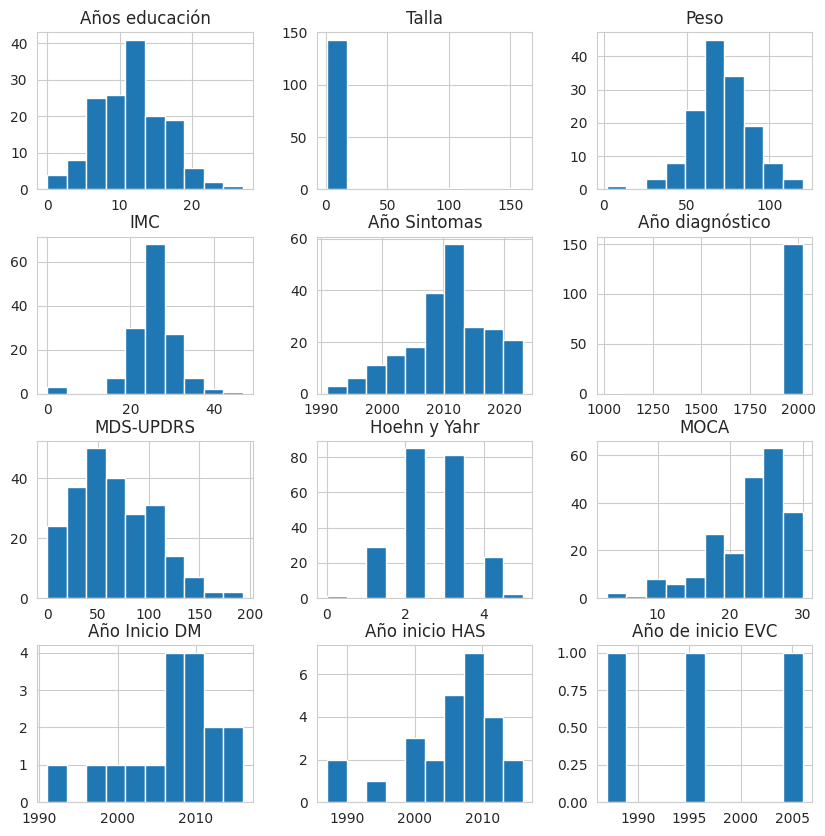

In [ ]:
data[numeric_cols].hist(figsize=(10, 10));

Analizamos las variables relacionadas con años y limpiamos algunos errores

In [22]:
data[[
       'Año Sintomas', 'Año diagnóstico',
       'Año Inicio DM', 'Año inicio HAS', 'Año de inicio EVC',
       'Año nacimiento']].describe(percentiles = np.arange(.05, 1.05, .05))

,Año Sintomas,Año diagnóstico,Año Inicio DM,Año inicio HAS,Año de inicio EVC
count,222.000000,151.000000,17.000000,26.000000,3.000000
mean,2010.860360,2004.801325,2006.705882,2005.807692,1996.333333
std,6.659349,81.357812,6.468817,7.381161,9.504385
min,1991.000000,1014.000000,1991.000000,1987.000000,1987.000000
5%,2000.000000,2000.000000,1995.800000,1989.000000,1987.900000
10%,2001.000000,2003.000000,1998.800000,1997.500000,1988.800000
15%,2003.000000,2005.000000,2000.800000,2000.000000,1989.700000
20%,2006.000000,2007.000000,2002.600000,2001.000000,1990.600000
25%,2007.000000,2008.000000,2005.000000,2002.500000,1991.500000
30%,2008.300000,2009.000000,2005.800000,2004.500000,1992.400000


In [23]:
data[[
       'Año Sintomas', 'Año diagnóstico',
       'Año Inicio DM', 'Año inicio HAS', 'Año de inicio EVC',
       'Año nacimiento']].describe(percentiles = np.arange(.01, .05, .01))

,Año Sintomas,Año diagnóstico,Año Inicio DM,Año inicio HAS,Año de inicio EVC
count,222.000000,151.000000,17.000000,26.000000,3.000000
mean,2010.860360,2004.801325,2006.705882,2005.807692,1996.333333
std,6.659349,81.357812,6.468817,7.381161,9.504385
min,1991.000000,1014.000000,1991.000000,1987.000000,1987.000000
1%,1992.630000,1995.000000,1991.960000,1987.000000,1987.180000
2%,1995.420000,1998.000000,1992.920000,1987.000000,1987.360000
3%,1997.000000,1999.500000,1993.880000,1987.000000,1987.540000
4%,1998.680000,2000.000000,1994.840000,1987.000000,1987.720000
50%,2012.000000,2013.000000,2006.000000,2008.000000,1996.000000
max,2023.000000,2022.000000,2016.000000,2016.000000,2006.000000


In [ ]:
#data.loc[data['Año diagnóstico'].between(0, 1900) | data['Año nacimiento'].between(0, 1900)]

In [24]:
data["Año diagnóstico"].replace(1014, 2014, inplace=True)
data["Año nacimiento"].replace(72, 1972, inplace=True)

# Generación de nuevas características

Se están generando nuevas características que podrían contribuir de manera más efectiva al análisis. A continuación, se detallan estas características:

1. **Edad**: Se determina la edad del paciente basándose en su fecha de nacimiento.
2. **Edad de diagnostico**: (Edad al diagnostico) Se calcula la edad que tenía el paciente en el momento del diagnóstico.
3. **Años desde diagnostico a sintomas**: (Años desde el Diagnóstico hasta los Síntomas) Se estima la edad que tenía el paciente cuando comenzó a manifestar los síntomas.
4. **Año de Diagnóstico - DM**: Se calcula la diferencia en años entre el diagnóstico de Parkinson y la enfermedad DM.
5. **Año de Diagnóstico - HAS**: Se calcula la diferencia en años entre el diagnóstico de Parkinson y la enfermedad HAS.
6. **Año de Diagnóstico - EVC**: Se calcula la diferencia en años entre el diagnóstico de Parkinson y la enfermedad EVC.

In [25]:
data['Edad Actual'] = data['Año nacimiento'].apply(calculate_years)
print(data['Edad Actual'].tail(7))

228    74
229    58
230    63
231     0
232     0
233     0
234     0
Name: Edad Actual, dtype: int64


In [26]:
data['Año nacimiento'] = data['Año nacimiento'].apply(extract_year)
data['Año nacimiento'] = pd.to_numeric(data['Año nacimiento'], errors='coerce')

In [27]:
data["Edad de diagnostico"] = data["Año diagnóstico"] - data["Año nacimiento"]
data["Años desde diagnostico a sintomas"] = data["Año diagnóstico"] - data["Año Sintomas"]

data['Año diagnostico - DM'] = data['Año Inicio DM'] - data["Año diagnóstico"]
data['Año diagnostico - HAS'] = data[ 'Año inicio HAS'] - data["Año diagnóstico"]
data['Año diagnostico - EVC'] = data[ 'Año de inicio EVC'] - data["Año diagnóstico"]

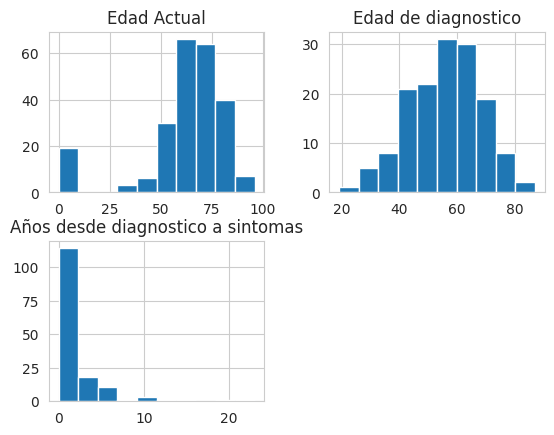

In [ ]:
data[["Edad Actual", "Edad de diagnostico", "Años desde diagnostico a sintomas"]].hist();

In [28]:
data[["Edad Actual", "Edad de diagnostico", "Años desde diagnostico a sintomas"]].describe(percentiles = np.arange(.1, 1.1, .1))

,Edad Actual,Edad de diagnostico,Años desde diagnostico a sintomas
count,235.000000,147.000000,151.000000
mean,62.195745,55.721088,1.927152
std,21.318203,12.369196,3.368678
min,0.000000,19.000000,0.000000
10%,43.800000,40.000000,0.000000
20%,55.000000,45.000000,0.000000
30%,60.000000,50.000000,0.000000
40%,64.000000,53.000000,0.000000
50%,67.000000,56.000000,1.000000
60%,70.000000,59.600000,1.000000


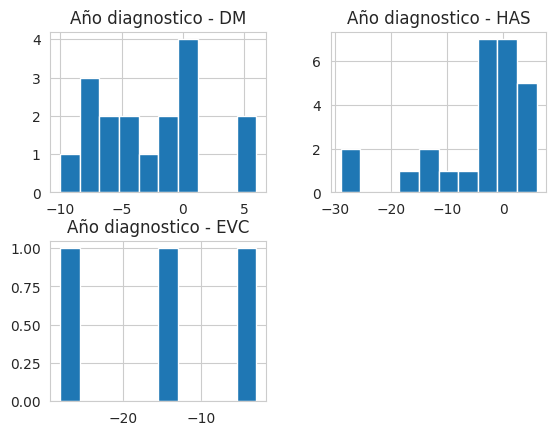

In [ ]:
data[['Año diagnostico - DM',
      'Año diagnostico - HAS',
      'Año diagnostico - EVC']].hist();

In [29]:
data[['Año diagnostico - DM',
      'Año diagnostico - HAS',
      'Año diagnostico - EVC',]].describe(percentiles = np.arange(.1, 1.1, .1))

,Año diagnostico - DM,Año diagnostico - HAS,Año diagnostico - EVC
count,17.000000,26.000000,3.000000
mean,-3.000000,-4.538462,-15.000000
std,4.582576,8.972093,12.529964
min,-10.000000,-29.000000,-28.000000
10%,-8.000000,-15.000000,-25.200000
20%,-7.600000,-10.000000,-22.400000
30%,-6.000000,-4.000000,-19.600000
40%,-5.000000,-3.000000,-16.800000
50%,-3.000000,-2.500000,-14.000000
60%,-1.400000,-1.000000,-11.800000


# Missing values

Según el análisis del mapa de valores faltantes, es evidente que nuestras variables numéricas requieren la aplicación de una técnica de imputación. La mediana, una medida de tendencia central resistente a la influencia de valores extremos o atípicos, proporciona una representación más precisa del valor central de un conjunto de datos. Esta resistencia a la distorsión es la razón principal por la que se selecciona como técnica de imputación.

In [30]:
cols= ['Edad Actual', 'Edad de diagnostico']
data[cols] = data[cols].replace({0:np.nan})

for col in ['Edad Actual', 'Edad de diagnostico', 'MDS-UPDRS','MOCA','Talla','Peso','IMC','Hoehn y Yahr']:
    data[col] = data[col].fillna(data[col].median())

print(data[['Edad Actual', 'Edad de diagnostico', 'MDS-UPDRS','MOCA','Talla','Peso','IMC','Hoehn y Yahr']].tail(5))

     Edad Actual  Edad de diagnostico  MDS-UPDRS  MOCA  Talla  Peso       IMC  \
230         63.0                 56.0         38  20.0   1.65  69.0  25.47666   
231         68.0                 56.0         93  24.0   1.65  69.0  25.47666   
232         68.0                 56.0          0  24.0   1.65  69.0  25.47666   
233         68.0                 56.0          0  24.0   1.65  69.0  25.47666   
234         68.0                 56.0         31  24.0   1.65  69.0  25.47666   

     Hoehn y Yahr  
230           3.0  
231           3.0  
232           2.0  
233           2.0  
234           1.0  


Para la variable Genero utilizaremos la moda para imputar los valures faltantes.

In [31]:
valor_mas_frecuente = data['Género'].mode()[0]
data['Género'].fillna(valor_mas_frecuente, inplace=True)
print(data['Género'].tail(10))

225     Femenino
226     Femenino
227    Masculino
228    Masculino
229    Masculino
230    Masculino
231    Masculino
232    Masculino
233    Masculino
234    Masculino
Name: Género, dtype: object


Para variables cateogoricas agregaremos la etiqueta de faltante.

In [32]:

columnas = ['Lado inicial', 'Tipo de inicio']

# Reemplaza los valores NaN por 'faltante' en las columnas seleccionadas
for col in columnas:
    data[col].fillna('faltante', inplace=True)

print(data[['Lado inicial', 'Tipo de inicio']].head(20))

   Lado inicial           Tipo de inicio
0     izquierdo     rigidez/bradicinesia
1     izquierdo                  temblor
2     izquierdo  alteracion de la marcha
3       derecho     rigidez/bradicinesia
4     izquierdo                  temblor
5       derecho     rigidez/bradicinesia
6     izquierdo                  temblor
7       derecho                  temblor
8     izquierdo                  temblor
9         ambos  alteracion de la marcha
10      derecho                  temblor
11    izquierdo                  temblor
12      derecho                  temblor
13    izquierdo                  temblor
14      derecho                  temblor
15    izquierdo     rigidez/bradicinesia
16      derecho                  temblor
17    izquierdo                  temblor
18      derecho                  temblor
19    izquierdo     rigidez/bradicinesia


Para las siguientes variables nominales optamos por un binary encoding ya que no tienen un orden natural.

In [33]:
encoder = ce.BinaryEncoder(cols=['Lado inicial', 'Tipo de inicio','Género'])
data = encoder.fit_transform(data)
#print(data)

#Escalamiento

Existen algoritmos de agrupamiento basados en la distancia, como K-means, la estandarización o la normalización pueden ser necesarias para asegurar que todas las características contribuyan por igual al cálculo de la distancia. Por este motivo procedemos a estandarizar dos variables que siguen una distribución gaussiana:

1. Edad
2. Edad de diagnostico

In [34]:
scaler = StandardScaler()

data[["Edad Actual","Edad de diagnostico"]] = scaler.fit_transform(data[["Edad Actual","Edad de diagnostico"]])


Dentro de nuestro data set existen dos variables numericas que  tienen limites inferiores y superiores conocidos. En este caso aplicamos una normalizacion ya que se busca mantener la distribucion de los datos:

1. MDS-UPDRS: En esta escala un valor 0 indica "no inhabilitado" y 260 indica "inhabilitado".
2. MOCA: La puntuación total posible es de 30 puntos; una puntuación de 26 o más se considera normal

In [35]:
# Extrae los valores de las columnas a normalizar
x_array = data[['MDS-UPDRS', 'MOCA','Talla','Peso','IMC']].values

# Normaliza los valores
normalized_x_array= preprocessing.normalize(x_array)

# Reemplaza las columnas originales con los valores normalizados
data[['MDS-UPDRS', 'MOCA','Talla','Peso','IMC']] = normalized_x_array

#print(data)

#**Filtrado para la selección de características y técnicas de extracción de características**

In [37]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA, FactorAnalysis

In [49]:
X = data

numeric_cols = [
    'Años educación',
    'Talla',
    'Peso',
    'IMC',
    'Año Sintomas',
    'Año diagnóstico',
    'MDS-UPDRS',
    'Hoehn y Yahr',
    'MOCA',
    'Año Inicio DM',
    'Año inicio HAS',
    'Año de inicio EVC',
    'Año nacimiento',
    'Edad Actual',
    'Edad de diagnostico',
    'Años desde diagnostico a sintomas',
    'Año diagnostico - DM',
    'Año diagnostico - HAS',
    'Año diagnostico - EVC'
]
# Excluir columnas categóricas y las que resultaron del BinaryEncoder del análisis de umbral de varianza y correlación
X_numeric =X[numeric_cols]


###**Umbral de Varianza**

El Umbral de Varianza es un método de selección de características que elimina todas aquellas que no cumplen con un cierto nivel de variación. La idea es que las características que no varían mucho entre las observaciones probablemente no contengan suficiente información útil para los algoritmos de aprendizaje automático, ya que son casi constantes y no ayudan a diferenciar entre las diferentes observaciones.

**Elección del umbral**
* Umbral = 0.0: Si configuramos el umbral en 0, eliminamos características que tengan el mismo valor en todas las observaciones, es decir, características constantes que no aportan información.

* Umbral > 0.0: Un valor mayor que 0 elimina las características que tienen baja varianza pero no son constantes. Por ejemplo, un umbral de 0.1 significa que estámos eliminando características cuya varianza no alcanza el 10% de la varianza de la característica con la varianza máxima (si los datos están normalizados) o simplemente el valor absoluto de varianza de 0.1 si no lo están.

In [51]:
selector_variance = VarianceThreshold(threshold=0.1)
X_variance = selector_variance.fit_transform(X_numeric)

# Crear un DataFrame para comparar las varianzas antes de aplicar el umbral
variances = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Variance': np.var(X_numeric, axis=0)
})

# Añadir una columna para indicar si la característica fue seleccionada o no
variances['Selected'] = selector_variance.get_support()

# Filtrar las características que no fueron seleccionadas
removed_features_variance = variances[~variances['Selected']]

# Mostrar las características eliminadas y su varianza
print("Características eliminadas por baja varianza:")
print(removed_features_variance[['Feature', 'Variance']])
print("Características antes del umbral de varianza:", X_numeric.shape[1])
print("Características después del umbral de varianza:", X_variance.shape[1])

Características eliminadas por baja varianza:
             Feature  Variance
Talla          Talla  0.005256
Peso            Peso  0.024558
IMC              IMC  0.004810
MDS-UPDRS  MDS-UPDRS  0.058625
MOCA            MOCA  0.005373
Características antes del umbral de varianza: 19
Características después del umbral de varianza: 14


###**Correlación**


In [53]:
# Crear un DataFrame para las características restantes después de aplicar el Umbral de Varianza
X_variance_df = pd.DataFrame(X_variance, columns=variances[variances['Selected']]['Feature'])

# Calcular la matriz de correlación
corr_matrix = X_variance_df.corr().abs()

# Seleccionar el triángulo superior de la matriz de correlación
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar las columnas con una correlación mayor a 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Crear un DataFrame con las características eliminadas y sus correlaciones máximas
correlation_info = []

for column in upper_tri.columns:
    max_corr = upper_tri[column][upper_tri[column] > 0.8].max()
    if not np.isnan(max_corr):
        max_corr_col = upper_tri[column][upper_tri[column] == max_corr].idxmax()
        to_drop.append(column)
        correlation_info.append({'Feature': column, 'Max Correlation': max_corr, 'Correlated With': max_corr_col})

removed_features_correlation = pd.DataFrame(correlation_info)

# Eliminar las características altamente correlacionadas
X_corr = X_variance_df.drop(columns=to_drop)

# Mostrar las características eliminadas por alta correlación
print("Características eliminadas por alta correlación:")
print(removed_features_correlation)

Características eliminadas por alta correlación:
                 Feature  Max Correlation    Correlated With
0        Año diagnóstico         0.838191       Año Sintomas
1      Año de inicio EVC         1.000000     Año inicio HAS
2         Año nacimiento         1.000000  Año de inicio EVC
3            Edad Actual         0.946705     Año nacimiento
4  Año diagnostico - HAS         1.000000  Año de inicio EVC
5  Año diagnostico - EVC         1.000000     Año inicio HAS


##**Conclusión**

En el proceso de preparación de datos para la construcción de un modelo de aprendizaje automático, hemos seguido las mejores prácticas descritas en la metodología CRISP-ML, enfocándonos en la fase de Preparación de los datos.

* Comprensión del negocio: Iniciamos comprendiendo la necesidad del negocio, la cual se enfoca en mejorar la precisión del modelo de predicción de un problema médico basado en una serie de características demográficas y clínicas de los pacientes.

* Comprensión de los datos: Exploramos los datos para identificar las variables categóricas y numéricas, así como las que fueron transformadas mediante técnicas de encoding binario. Esta fase es crucial para entender la distribución de los datos y detectar posibles problemas como valores faltantes o datos inconsistentes.

* Preparación de los datos:Imputación de valores faltantes: Utilizamos la técnica de imputación para reemplazar los valores faltantes, asegurando que el dataset esté completo y listo para el análisis.

* Encoding de variables categóricas: Aplicamos BinaryEncoder a las columnas categóricas relevantes, lo que permitió transformar estas características en un formato adecuado para los algoritmos de aprendizaje automático.

* Selección de características:

 * Umbral de varianza: Aplicamos el Umbral de Varianza para eliminar las características con baja varianza, ya que estas no aportan información significativa al modelo.
 * Análisis de correlación: Realizamos un análisis de correlación para identificar y eliminar características altamente correlacionadas, evitando la redundancia y reduciendo la dimensionalidad del dataset.

* Combinar características: Finalmente, combinamos las características numéricas seleccionadas con las variables categóricas y las resultantes del encoding binario para obtener un conjunto de datos optimizado.

###Resultados obtenidos:
* Umbral de varianza: Eliminamos características con baja varianza, reduciendo la complejidad del modelo.

* Análisis de correlación: Identificamos y eliminamos características redundantes, manteniendo solo aquellas que aportan información única.

* Dataset final: El conjunto de datos resultante está limpio, balanceado y contiene solo las características más relevantes, lo que mejora la eficiencia y efectividad del proceso de modelado.

###Importancia en CRISP-ML:
Estos pasos son fundamentales en la preparación de datos, una fase crítica en la metodología CRISP-ML, ya que un buen preprocesamiento asegura que el modelo de aprendizaje automático se construya sobre una base sólida, lo que puede llevar a un mejor desempeño y resultados más precisos en la fase de modelado y evaluación posterior.

#Referencias


1.   Balestrino, Roberta; Hurtado-Gonzalez, Carlos Alberto; Stocchi, Fabrizio; Radicati, Fabiana Giada; Chaudhuri, K. Ray; Rodriguez-Blazquez, Carmen; Martinez-Martin, Pablo (2019-11-27). "Applications of the European Parkinson's Disease Association sponsored Parkinson's Disease Composite Scale (PDCS)". npj Parkinson's Disease. 5 (1): 26. doi:10.1038/s41531-019-0097-1. ISSN 2373-8057. PMC 6881347. PMID 31798050.

2.   https://www.lb7.uscourts.gov/documents/17cv40189.pdf